# 3D Non-Planar Double Pendulum Golf Swing - Arm Plane Motion

## Tucker Knaak - Department of Physics, Creighton University - 2022/2024

#### Both the 2D Planar and 3D Non-Planar Double Pendulum Golf Swings constrain the golfer's arms to swing in a plane.  In the 3D Non-Planar Double Pendulum Golf Swing, the arm plane angle $\theta_1$ is rotated ccw about the $y-$axis in the $yz-$plane.

#### This code is used to investigate the planar motion of the arms of PGA Tour golfer Rory McIlroy with data found from Physlet's Tracker.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''Required Functions'''
from IPython.display import display
from scipy.odr import ODR, Model, Data, RealData

#### This cell creates a dataframe from reads the Excel file containing the $yz-$coordinates of the hands of Rory McIlroy.

In [2]:
'''Create dataframe from Excel'''
coords = pd.read_excel('RoryMcIlroyDriverHands.xlsx', names = 
                       ['$z_1$', '$y_1$', '$z_2$', '$y_2$', '$z_3$', '$y_3$', '$z_4$', '$y_4$', '$z_5$', '$y_5$'])

'''Print dataframe'''
display(coords.style.hide(axis = 'index'))

$z_1$,$y_1$,$z_2$,$y_2$,$z_3$,$y_3$,$z_4$,$y_4$,$z_5$,$y_5$
-0.253961,0.410728,-0.263367,0.413863,-0.263367,0.413863,-0.263367,0.420134,-0.260804,0.416045
-0.250826,0.388780,-0.260232,0.398186,-0.257097,0.395051,-0.257097,0.398186,-0.254595,0.388102
-0.244555,0.363698,-0.257097,0.376239,-0.250826,0.363698,-0.253961,0.373104,-0.254595,0.360158
-0.238285,0.335480,-0.250826,0.348021,-0.244555,0.335480,-0.247691,0.348021,-0.242175,0.332215
-0.235149,0.300991,-0.244555,0.310397,-0.238285,0.297856,-0.238285,0.310397,-0.239071,0.298062
-0.222608,0.250826,-0.235149,0.263367,-0.225743,0.250826,-0.228879,0.266503,-0.226651,0.248385
-0.203796,0.191255,-0.216337,0.197525,-0.203796,0.188119,-0.203796,0.194390,-0.204918,0.189394
-0.159902,0.097195,-0.172443,0.106601,-0.169308,0.100330,-0.159902,0.103466,-0.161450,0.096249
-0.097195,-0.012541,-0.106601,-0.015677,-0.097195,-0.021947,-0.090924,-0.018812,-0.090040,-0.031048
-0.009406,-0.147360,-0.015677,-0.150496,-0.006271,-0.159902,-0.006271,-0.156766,0.003105,-0.167660


#### This cell creates lists of $y$ and $z-$coordinates from the dataframe and finds the averages and standard errors.

In [3]:
'''Create lists of z-coordinates from dataframe for each trial'''
z1_points = [float(z) for z in coords.iloc[:,0].tolist()]
z2_points = [float(z) for z in coords.iloc[:,2].tolist()]
z3_points = [float(z) for z in coords.iloc[:,4].tolist()]
z4_points = [float(z) for z in coords.iloc[:,6].tolist()]
z5_points = [float(z) for z in coords.iloc[:,8].tolist()]

'''Find average and error of z-coordinates'''
z_avg = list(np.average([z1_points, z2_points, z3_points, z4_points, z5_points], axis = 0))
z_std = list(np.std([z1_points, z2_points, z3_points, z4_points, z5_points], axis = 0))
z_err = [z / np.sqrt(5) for z in z_std]

'''Create lists of y-coordinates from dataframe for each trial'''
y1_points = [float(y) for y in coords.iloc[:,1].tolist()]
y2_points = [float(y) for y in coords.iloc[:,3].tolist()]
y3_points = [float(y) for y in coords.iloc[:,5].tolist()]
y4_points = [float(y) for y in coords.iloc[:,7].tolist()]
y5_points = [float(y) for y in coords.iloc[:,9].tolist()]

'''Find average and error of y-coordinates'''
y_avg = list(np.average([y1_points, y2_points, y3_points, y4_points, y5_points], axis = 0))
y_std = list(np.std([y1_points, y2_points, y3_points, y4_points, y5_points], axis = 0))
y_err = [y / np.sqrt(5) for y in y_std]

'''Find arm plane angle theta1'''
theta1 = np.abs(np.degrees(np.arctan(z_avg[0] / y_avg[0])))
print(f'Rory McIlroy Arm Plane Angle: \u03B8_1 = {theta1:.2f}\u00B0')

Rory McIlroy Arm Plane Angle: θ_1 = 32.17°


#### This cell plots the $yz-$coordinates from each trial as well as the averages.

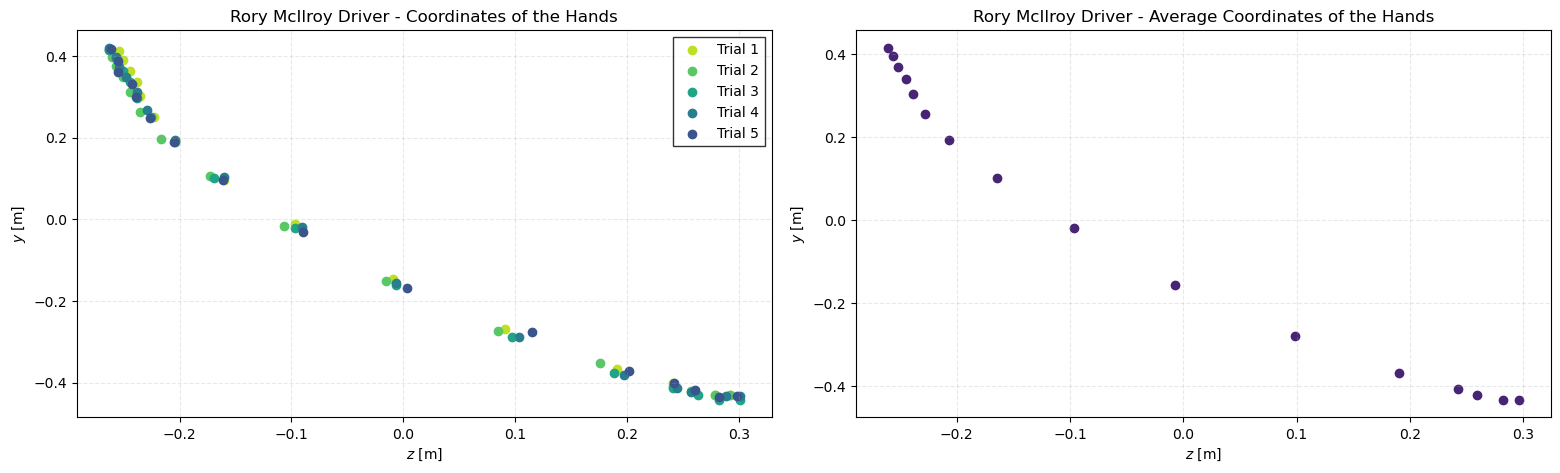

In [4]:
'''Create figure'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5), gridspec_kw = {'width_ratios': [1, 1]})
fig.tight_layout(pad = 3)
colors = plt.cm.viridis(np.linspace(0.9, 0.1, 6))

'''First figure --> yz-coordinates of each trial'''
ax1.set_xlabel('$z$ [m]')
ax1.set_ylabel('$y$ [m]')
ax1.set_title('Rory McIlroy Driver - Coordinates of the Hands')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax1.scatter(z1_points, y1_points, color = colors[0], label = 'Trial 1')
ax1.scatter(z2_points, y2_points, color = colors[1], label = 'Trial 2')
ax1.scatter(z3_points, y3_points, color = colors[2], label = 'Trial 3')
ax1.scatter(z4_points, y4_points, color = colors[3], label = 'Trial 4')
ax1.scatter(z5_points, y5_points, color = colors[4], label = 'Trial 5')
legend = ax1.legend(loc = 'upper right', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Second figure --> average yz-coordinates'''
ax2.set_xlabel('$z$ [m]')
ax2.set_ylabel('$y$ [m]')
ax2.set_title('Rory McIlroy Driver - Average Coordinates of the Hands')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax2.scatter(z_avg, y_avg, color = colors[5]);

#### This cell performs a linear ODR fit with scipy for the $yz-$coordinates.

Coefficients
a = -1.5047 ± 0.0621
b = -0.0434 ± 0.0149 m

Residual Variance and Coefficient of Determination
σ^2 = 279.2133
R^2 = 0.9595


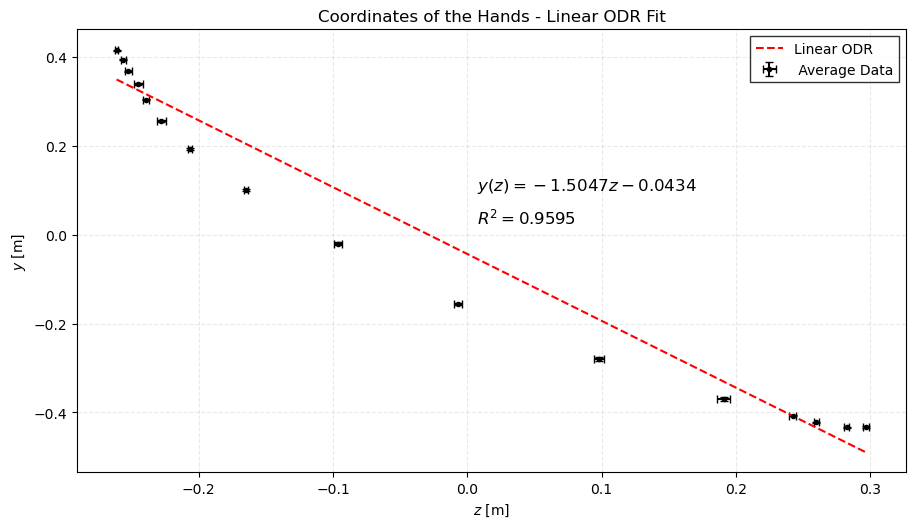

In [5]:
'''Linear function y(z) = az + b for curvefit'''
def linear_curvefit(params, z):
    return (params[0] * z) + (params[1])

'''Scipy ODR fit'''
data_l = RealData(z_avg, y_avg, z_err, y_err)
model_l = Model(linear_curvefit)
pguess_l = [-1, 0.0]
odr_l = ODR(data_l, model_l, pguess_l)
output_l = odr_l.run()
a_l, a_l_std = output_l.beta[0], output_l.sd_beta[0]  #best fit and standard deviation for beta0
b_l, b_l_std = output_l.beta[1], output_l.sd_beta[1]  #best fit and standard deviation for beta1
res_var_l = output_l.res_var                          #residual variance of the curvefit

'''Find R^2 value of fit'''
y_mean = np.mean(y_avg)
ss_res_l = 0.0
ss_tot_l = 0.0
for index in range(len(z_avg)):
    ss_res_l += (linear_curvefit(output_l.beta, z_avg[index]) - y_avg[index])**2
    ss_tot_l += (y_avg[index] - y_mean)**2
rsquared_l = 1 - (ss_res_l / ss_tot_l)

'''Print results'''
print('Coefficients')
print('a = {:.4f} \u00B1 {:.4f}'.format(a_l, a_l_std))
print('b = {:.4f} \u00B1 {:.4f} m'.format(b_l, b_l_std))
print('')
print('Residual Variance and Coefficient of Determination')
print('\u03C3^2 = {:.4f}'.format(res_var_l))
print('R^2 = {:.4f}'.format(rsquared_l))

'''Create list for range of z values'''
z_range = np.linspace(z_avg[0], z_avg[-1], 100)

'''Create figure and plot results'''
fig, ax = plt.subplots(figsize = (9, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$z$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_title('Coordinates of the Hands - Linear ODR Fit')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.errorbar(z_avg, y_avg, z_err, y_err, capsize = 3, fmt = 'k.', label = ' Average Data')
ax.plot(z_range, linear_curvefit(output_l.beta, z_range), linestyle = 'dashed', color = 'red', label = 'Linear ODR')
ax.annotate('$y(z) = {:.4f}z - {:.4f}$'.format(a_l, abs(b_l)), (0.0075, 0.1), size = 12)
ax.annotate('$R^2 = {:.4f}$'.format(rsquared_l), (0.0075, 0.025), size = 12)
legend = ax.legend(loc = 'upper right', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/RoryHands_Linear_ODR.png', bbox_inches = 'tight')

#### This cell performs a quadratic ODR fit with scipy for the $yz-$coordinates.

Coefficients
a = 2.3808 ± 0.2213 m^-1
b = -1.5407 ± 0.0227
c = -0.1829 ± 0.0138 m

Residual Variance and Coefficient of Determination
σ^2 = 23.9545
R^2 = 0.9951


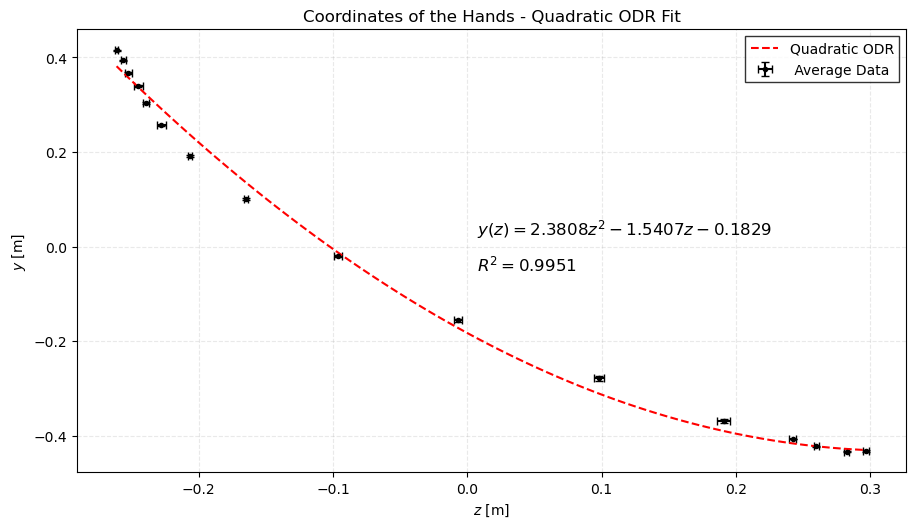

In [6]:
'''Quadratic function y(z) = az^2 + bz + c for curvefit'''
def quadratic_curvefit(params, z):
    return (params[0] * z**2) + (params[1] * z) + (params[2])


'''Scipy ODR fit'''
data_q = RealData(z_avg, y_avg, z_err, y_err)
model_q = Model(quadratic_curvefit)
pguess_q = [1, -1, 0.5]
odr_q = ODR(data_q, model_q, pguess_q)
output_q = odr_q.run()
a_q, a_q_std = output_q.beta[0], output_q.sd_beta[0]  #best fit and standard deviation for a
b_q, b_q_std = output_q.beta[1], output_q.sd_beta[1]  #best fit and standard deviation for b
c_q, c_q_std = output_q.beta[2], output_q.sd_beta[2]  #best fit and standard deviation for c
res_var_q = output_q.res_var                          #residual variance of the curvefit

'''Find R^2 value of curvefit'''
y_mean = np.mean(y_avg)
ss_res_q = 0.0
ss_tot_q = 0.0
for index in range(len(z_avg)):
    ss_res_q += (quadratic_curvefit(output_q.beta, z_avg[index]) - y_avg[index])**2
    ss_tot_q += (y_avg[index] - y_mean)**2
rsquared_q = 1 - (ss_res_q / ss_tot_q)

'''Print results'''
print('Coefficients')
print('a = {:.4f} \u00B1 {:.4f} m^-1'.format(a_q, a_q_std))
print('b = {:.4f} \u00B1 {:.4f}'.format(b_q, b_q_std))
print('c = {:.4f} \u00B1 {:.4f} m'.format(c_q, c_q_std))
print('')
print('Residual Variance and Coefficient of Determination')
print('\u03C3^2 = {:.4f}'.format(res_var_q))
print('R^2 = {:.4f}'.format(rsquared_q))

'''Create list for the range of z values'''
z_range = np.linspace(z_avg[0], z_avg[-1], 100)

'''Create figure and plot results'''
fig, ax = plt.subplots(figsize = (9, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$z$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_title('Coordinates of the Hands - Quadratic ODR Fit')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.errorbar(z_avg, y_avg, z_err, y_err, capsize = 3, fmt = 'k.', label = ' Average Data')
ax.plot(z_range, quadratic_curvefit(output_q.beta, z_range), linestyle = 'dashed', color = 'red', label = 'Quadratic ODR')
ax.annotate('$y(z) = {:.4f}z^2 - {:.4f}z - {:.4f}$'.format(a_q, abs(b_q), abs(c_q)), (0.0075, 0.025), size = 12)
ax.annotate('$R^2 = {:.4f}$'.format(rsquared_q), (0.0075, -0.05), size = 12)
legend = ax.legend(loc = 'upper right', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/RoryHands_Quadratic_ODR.png', bbox_inches = 'tight')

#### This cell performs a linear ODR fit with scipy for the adjusted $yz-$coordinates after the arm plane angle has flattened.

Coefficients
a = -1.1588 ± 0.0495
b = -0.1175 ± 0.0117 m

Residual Variance and Coefficient of Determination
σ^2 = 55.4610
R^2 = 0.9856


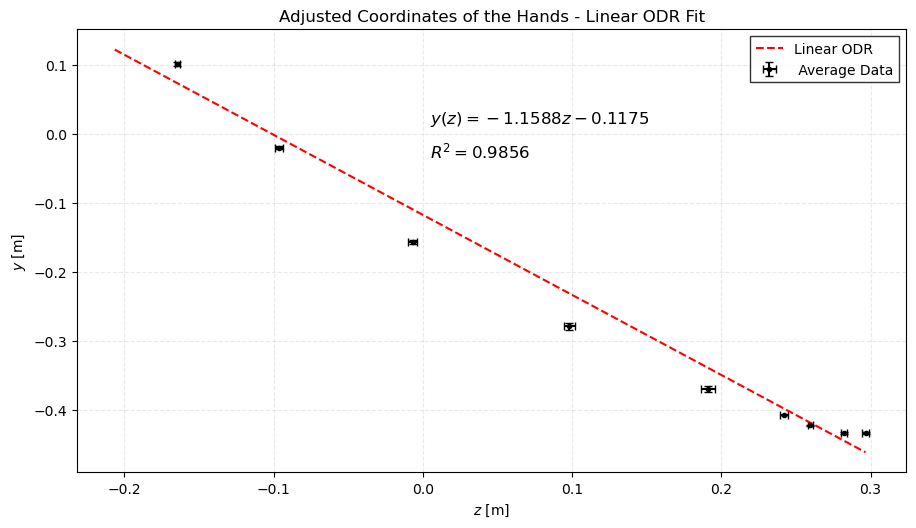

In [7]:
'''Scipy ODR fit'''
data_l_adj = RealData(z_avg[7:], y_avg[7:], z_err[7:], y_err[7:])
model_l_adj = Model(linear_curvefit)
pguess_l_adj = [-1, 0.0]
odr_l_adj = ODR(data_l_adj, model_l_adj, pguess_l_adj)
output_l_adj = odr_l_adj.run()
a_l_adj, a_l_adj_std = output_l_adj.beta[0], output_l_adj.sd_beta[0]  #best fit and standard deviation for beta0
b_l_adj, b_l_adj_std = output_l_adj.beta[1], output_l_adj.sd_beta[1]  #best fit and standard deviation for beta1
res_var_l_adj = output_l_adj.res_var                                  #residual variance of the curvefit

'''Find R^2 value of fit'''
y_mean = np.mean(y_avg[7:])
ss_res_l_adj = 0.0
ss_tot_l_adj = 0.0
for index in range(6, len(z_avg[7:])):
    ss_res_l_adj += (linear_curvefit(output_l_adj.beta, z_avg[index]) - y_avg[index])**2
    ss_tot_l_adj += (y_avg[index] - y_mean)**2
rsquared_l_adj = 1 - (ss_res_l_adj / ss_tot_l_adj)

'''Print results'''
print('Coefficients')
print('a = {:.4f} \u00B1 {:.4f}'.format(a_l_adj, a_l_adj_std))
print('b = {:.4f} \u00B1 {:.4f} m'.format(b_l_adj, b_l_adj_std))
print('')
print('Residual Variance and Coefficient of Determination')
print('\u03C3^2 = {:.4f}'.format(res_var_l_adj))
print('R^2 = {:.4f}'.format(rsquared_l_adj))

'''Create list for range of z values'''
z_range = np.linspace(z_avg[6], z_avg[-1], 100)

'''Create figure and plot results'''
fig, ax = plt.subplots(figsize = (9, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$z$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_title('Adjusted Coordinates of the Hands - Linear ODR Fit')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.errorbar(z_avg[7:], y_avg[7:], z_err[7:], y_err[7:], capsize = 3, fmt = 'k.', label = ' Average Data')
ax.plot(z_range, linear_curvefit(output_l_adj.beta, z_range), linestyle = 'dashed', color = 'red', label = 'Linear ODR')
ax.annotate('$y(z) = {:.4f}z - {:.4f}$'.format(a_l_adj, abs(b_l_adj)), (0.005, 0.015), size = 12)
ax.annotate('$R^2 = {:.4f}$'.format(rsquared_l_adj), (0.005, -0.035), size = 12)
legend = ax.legend(loc = 'upper right', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/RoryHands_Adjusted_Linear_ODR.png', bbox_inches = 'tight')